Esse notebook terá como foco analisar as relações das variáveis com relação a variável churn e remover outliers para depois para posteriormente gerar modelos de previsão de churn.

Em outro [notebook](https://github.com/PedroReste/diagnostics_and_descriptive_analysis/tree/main/pt_analise_de_dados_de_ecommerce_para_previsoes_de_churn) foi realizado uma análise exploratória dos dados e alguns tratamentos para dados faltantes e transformar variáveis categóricas escritas em dummies (0 e 1).

Esses dados são originais desse dataset do [Kaggle](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction).

Após toda investigação realizada aqui, no [próximo notebook](https://github.com/PedroReste/prescriptive_and_prediction_analysis/blob/main/pt_analise_e_modelo_para_previsao_de_churn_em_ecommerce/modelo_de_previsao_de_churn_em_um_ecommerce.ipynb), será gerados alguns modelos de previsão de churn e será verifcado o que faz sentido ou não estar nesses modelos.

# **Bibliotecas e Datasets**

**Bibliotecas**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

**Dataset**

In [2]:
url = "https://github.com/PedroReste/prescriptive_and_prediction_analysis/raw/main/pt_analise_e_modelo_para_previsao_de_churn_em_ecommerce/ecommerce_dataset_tratado.xlsx"
df = pd.read_excel(url)

In [3]:
#Configurações gerais
plt.style.use('ggplot')
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 40)

In [4]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredPaymentMode_Cash,PreferredPaymentMode_Credit,PreferredPaymentMode_Debit,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others
0,50001,1,4,1,3,6,0,3,3,2,0,9,1,11,1,1,5,160,0,0,1,0,0,0,0,1,0,0
1,50002,1,2,1,1,8,1,3,4,3,0,7,1,15,0,1,0,121,0,0,0,0,1,0,0,0,1,0
2,50003,1,2,1,1,30,1,2,4,3,0,6,1,14,0,1,3,120,0,0,1,0,0,0,0,0,1,0
3,50004,1,0,1,3,15,1,2,4,5,0,8,0,23,0,1,3,134,0,0,1,0,0,0,0,1,0,0
4,50005,1,0,1,1,12,1,2,3,5,0,3,0,11,1,1,3,130,0,1,0,0,0,0,0,0,1,0


# **Relembrando todas as variáveis do dataset**
- **CustomerID:** Identificador único dos usuários.
- **Churn:** Sinalização se o usuário deixou de ser cliente ou não. 0 para não e 1 para sim.
- **Tenure:** Tempo que os usuários estão (ou estavam) como clientes da empresa.
- **PreferredLoginDevice:** Método preferencial para logar ao e-commerce. 0 para computer e 1 para mobile.
- **CityTier:**	O nível da cidade.
- **WarehouseToHome:** Distância entre o armazém e os domicílios.
- **Gender:** Gênero dos usuários. 0 para mulher e 1 para homem.
- **HourSpendOnApp:** Quantidade de horas gastas pelos usuários no app ou website do e-commerce.
- **NumberOfDeviceRegistered:**	Total de dispositivos registrado por um usuário.
- **SatisfactionScore:** Pontuação, entre 0 e 5, da satisfação dos usuários.
- **MaritalStatus:** Estado civil dos usuários. 0 para solteiro e 1 para casado.
- **NumberOfAddress:** Total de endereços registrados.
- **Complain:** Se houve reclamações no último mês. 0 para não e 1 para sim.
- **OrderAmountHikeFromlastYear:** Crescimento percentual de pedidos em relação ao último ano.
- **CouponUsed:** Quantidade de cupons utilizados no último mês.
- **OrderCount:** Total de pedidos feitos no último mês.
- **DaySinceLastOrder:** Quantidade de dias desde a última compra.
- **CashbackAmount:** Valor médio do cashback do último mês.

**Variáveis "dummyzadas" em colunas**
- **PreferredPaymentMode:** Formato de pagamento preferencial.
    - PreferredPaymentMode_Cash
    - PreferredPaymentMode_Credit
    - PreferredPaymentMode_Debit
    - PreferredPaymentMode_E wallet
    - PreferredPaymentMode_UPI
- **PreferedOrderCat:**	Categoria preferencial dos usuários do último mês.
    - PreferedOrderCat_Fashion
    - PreferedOrderCat_Grocery
    - PreferedOrderCat_Laptop & Accessory
    - PreferedOrderCat_Mobile
    - PreferedOrderCat_Others

# **Análise de dados com foco na variável Chrun**

Como comentado no começo do notebook, já foi feito uma análise incial para conhecer um pouco mais os dados existentes nessa base, além dos tratamentos e preenchimento de informações vazias.

Nas próximas células serpa realizado um comparativo com a variável Churn para entender se temos carecterísticas predominantes que podem levar ao churn. Aqui está o [link](https://github.com/PedroReste/diagnostics_and_descriptive_analysis/tree/main/pt_analise_de_dados_de_ecommerce_para_previsoes_de_churn), caso não tenha lido a análise exploratória dos dados.

**Churn**

In [5]:
#Proporção percentual da base entre churners e não churners
df["Churn"].value_counts(normalize=True)

Churn
0    0.831616
1    0.168384
Name: proportion, dtype: float64

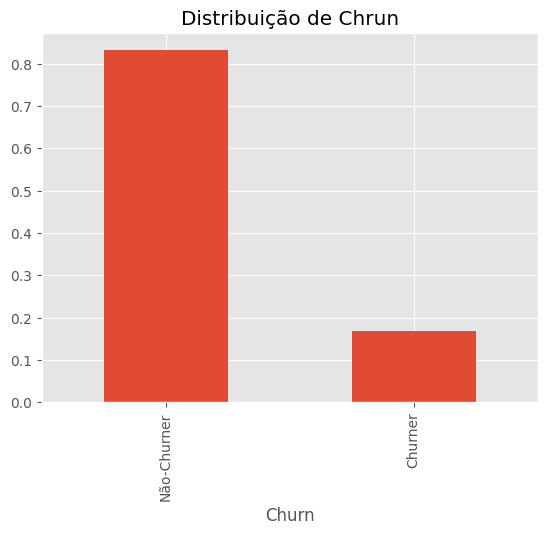

In [6]:
_ = df["Churn"].value_counts(normalize=True).plot.bar()
_ = plt.title("Distribuição de Chrun")
_ = plt.xticks(range(2), ["Não-Churner", "Churner"])

Temos uma base disproporsional na quantidade não-churners e churners, é importante saber isso para separar uma quantidade ideal para treino e teste nos modelos.

In [7]:
#Revisando os valores únicos de cada variável
print(df.nunique().sort_values())

PreferedOrderCat_Others                   2
PreferredPaymentMode_Debit                2
PreferredPaymentMode_E wallet             2
PreferredPaymentMode_UPI                  2
PreferedOrderCat_Fashion                  2
PreferedOrderCat_Mobile                   2
Complain                                  2
MaritalStatus                             2
PreferredPaymentMode_Cash                 2
PreferredPaymentMode_Credit               2
Gender                                    2
PreferedOrderCat_Grocery                  2
PreferredLoginDevice                      2
PreferedOrderCat_Laptop & Accessory       2
Churn                                     2
CityTier                                  3
SatisfactionScore                         5
HourSpendOnApp                            6
NumberOfDeviceRegistered                  6
NumberOfAddress                          15
OrderAmountHikeFromlastYear              16
OrderCount                               16
CouponUsed                      

In [8]:
"""
Esse código separa as variáveis categóricas das variáveis continuas
utilizando uma regra com base na quantidade de valores únicos.
Variáveis com menos ou igual a 5 valores únicos, são agrupados na lista de colunas categóricas
e valores com mais de 5 valores únicos, são agrupados na coluna de variáveis contínuas

Essa é uma estratégia até para bases de dados maiores que possuem diversas variáveis,
porque ficaria inviável verificar uma por uma sem um tempo hábil disponível.
"""

colunas_categoricas = df.loc[:, df.nunique() <= 5].columns
colunas_categoricas = colunas_categoricas.drop("Churn") #Removendo a variável Churn da lista
colunas_continuas = df.loc[:, df.nunique() > 5].columns
colunas_continuas = colunas_continuas.drop("CustomerID") #Removendo a variável Customer ID da lista

## **Variáveis continuas**

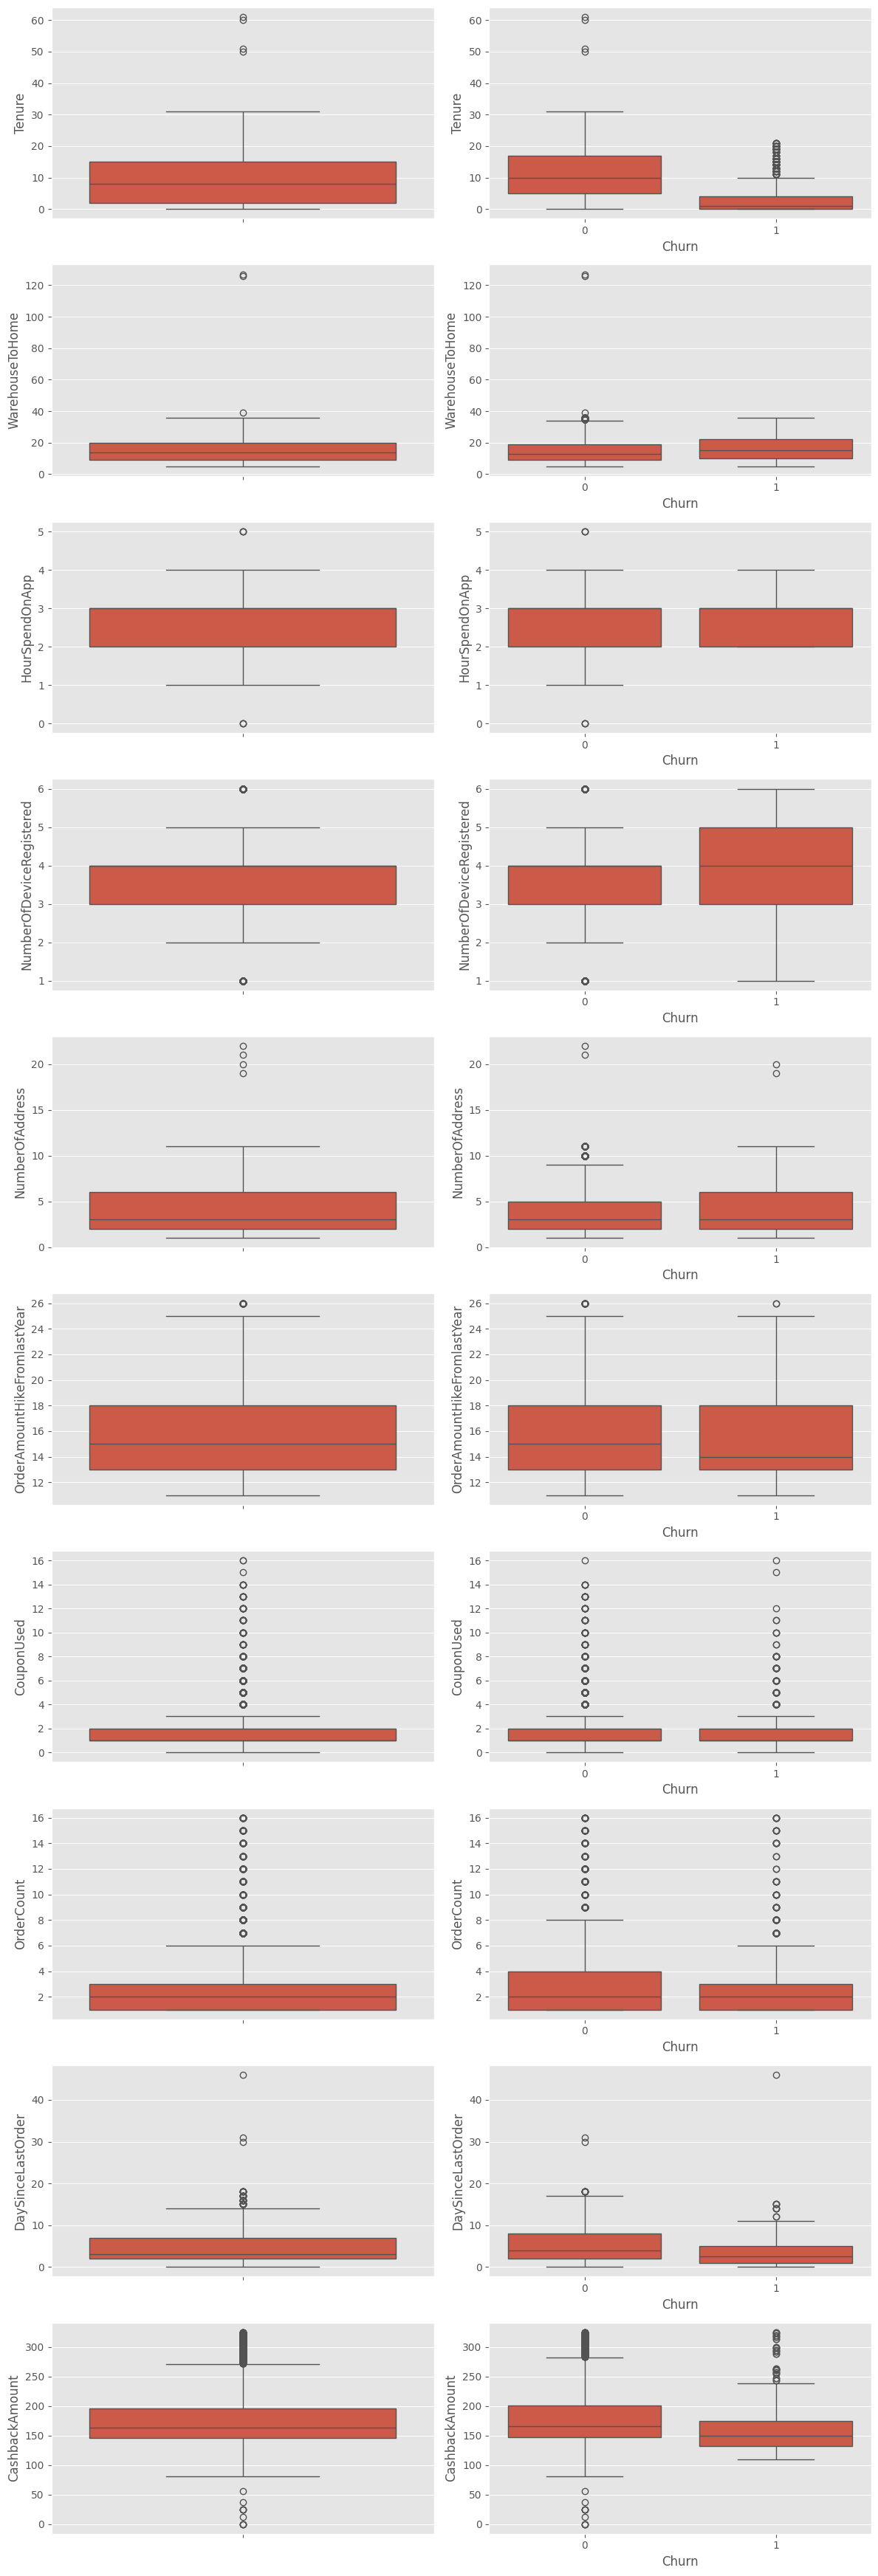

In [9]:
#Gerando os gráficos de cada variável comparando e segmento com base no churn para verificar se existem variáveis que se destacam
fig, axes = plt.subplots(len(colunas_continuas), 2, figsize=(12, 35))
num = 0

for i in colunas_continuas:
    _ = sns.boxplot(data=df, y=i, ax=axes[num, 0])
    _ = sns.boxplot(data=df, x="Churn", y=i, ax=axes[num, 1])
    num += 1
    _ = fig.tight_layout()

**Tenure**

Aqui trago um ponto de atenção, na análise anterior, eu tinha feito um filtro errado que acabou dando a impressão que o churn era dado pelo tempo que os clientes estavam na empresa.

Corrigi esse filtro mostrando que existem tanto usuários não-chuernes quanto churners no período curto de tempo no e-commerce.

Text(0.5, 0, '')

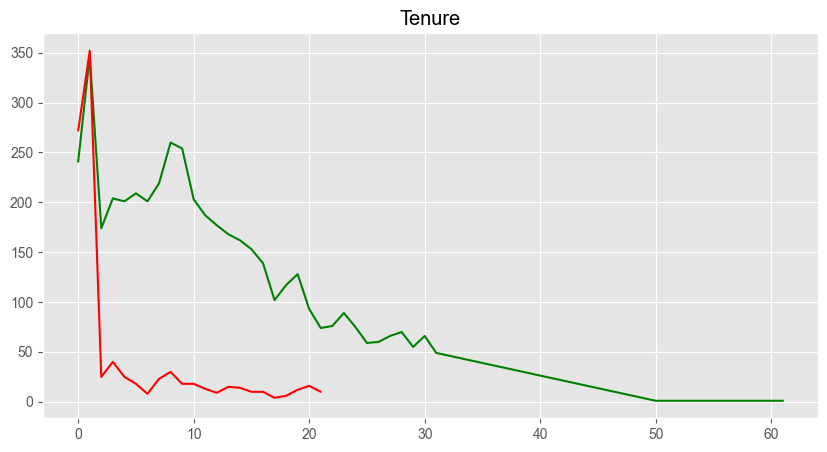

In [10]:
fig, axes = plt.subplots(figsize=(10, 5))

var = df['Tenure'][df["Churn"] == 0].sort_values().value_counts(sort=False)
sns.lineplot(x= var.index, y=var.values, color="green")

sns.set_style("whitegrid")
var = df['Tenure'][df["Churn"] == 1].sort_values().value_counts(sort=False)
sns.lineplot(x= var.index, y=var.values, color="red")

axes.set_title("Tenure")
axes.set_xlabel("")

**Warehouse to Home**

Filtrando apenas usuários com a distância menos de 40km entre o armázem e o domicílio porque estava difícil enteder o bloxplot anterior.

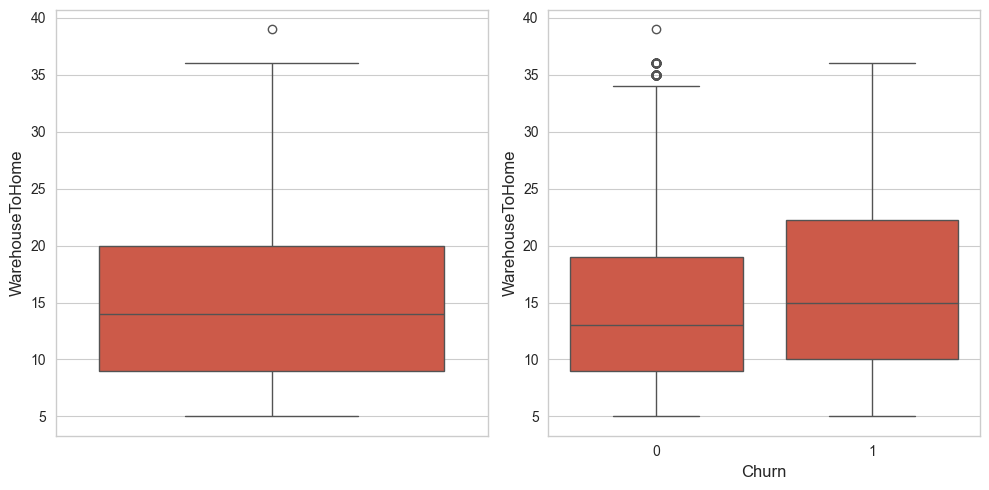

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))

_ = sns.boxplot(data=df[df["WarehouseToHome"] < 40], y="WarehouseToHome", ax=axes[0])
_ = sns.boxplot(data=df[df["WarehouseToHome"] < 40], x="Churn", y="WarehouseToHome", ax=axes[1])

_ = fig.tight_layout()

Parece que não faz sentido manter clientes utilizaram menos de 1h ou mais de 5h o app/site da empresa.
Apenas comparando com o churn, não pacere ser uma métrica que seja tão relevante.

In [12]:
df["HourSpendOnApp"].sort_values().value_counts(sort=False), df["HourSpendOnApp"].sort_values().value_counts(normalize=True, sort=False) * 100

(HourSpendOnApp
 0       3
 1      35
 2    1724
 3    2689
 4    1176
 5       3
 Name: count, dtype: int64,
 HourSpendOnApp
 0     0.053286
 1     0.621670
 2    30.621670
 3    47.761989
 4    20.888099
 5     0.053286
 Name: proportion, dtype: float64)

## **Variáveis Categóricas**

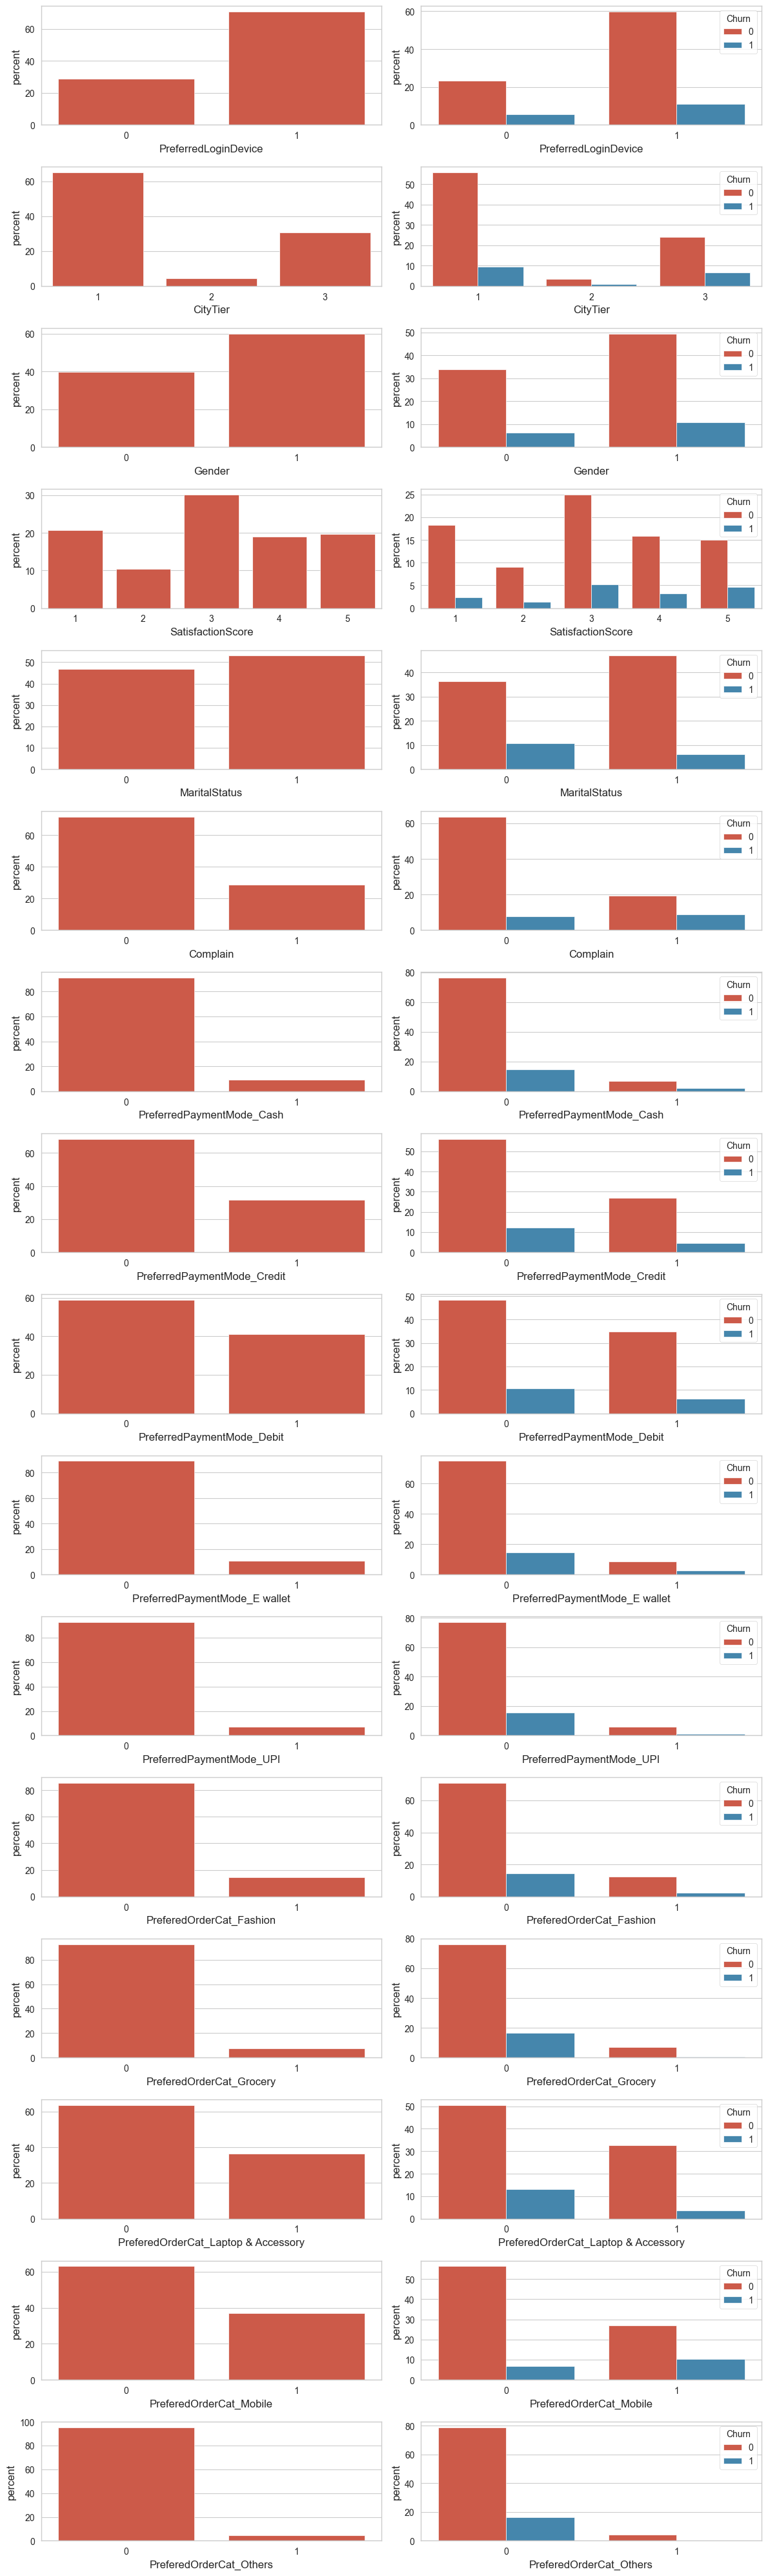

In [13]:
#Gerando os gráficos de cada variável comparando e segmento com base no churn para verificar se existem variáveis que se destacam
fig, axes = plt.subplots(len(colunas_categoricas), 2, figsize=(12, 40))
num = 0

for i in colunas_categoricas:
    _ = sns.countplot(data=df, x=i, stat="percent", ax=axes[num, 0])
    _ = sns.countplot(data=df, x=i, stat="percent", hue="Churn", ax=axes[num, 1])
    num += 1
    _ = fig.tight_layout()

# **Insights até o momento**

Pacere que as variáveis quando comparadas ao Churn não parecem fazer tanto sentido. Posteriormente vamos gerar uma matriz de correlação para verificar se encontramos algum padrão.

**Variáveis com possíveis outliers**
- Tenure
- WarehouseToHome
- HourSpendOnApp
- NumberOfDeviceRegistered
- NumberOfAddress
- OrderAmountHikeFromlastYear
- CouponUsed
- OrderCount
- DaySinceLastOrder
- CashbackAmount

# **Outliers e correlação dos dados**

## **Outliers**

Para remover os outliers, será aplicado a técncia baseada na diferença entre o desvio-padrão em relação a média. Vamos apenas considerar os dados que estão dentro de 03 vezes o valor do desvio-padrão em relação a média, fórmulas abaixo:

**Limite Superior = media + (desvio-padrão * 3)** e **Limite Inferior = media - (desvio-padrão * 3)**

Existem outras formas para lidar com outliers, como o Intervalo Interquartílico (IQR), mas essa técnica removou muitos dados e poderia gerar outra distorção nos dados.

In [14]:
#Gerando um novo df para remover os outliers na regra acima
df_sem_outliers = df.copy()

for i in colunas_continuas:
    media = df[i].mean()
    desv_pd = df[i].std()

    limite = desv_pd * 3
    abaixo, acima = media - limite, media + limite

    df_sem_outliers = df_sem_outliers[(df_sem_outliers[i] >= abaixo) & (df_sem_outliers[i] <= acima)]

#Comparando o df original com sem outliers e diferença entre eles
df.shape[0] , df_sem_outliers.shape[0], df.shape[0] - df_sem_outliers.shape[0]

(5630, 5348, 282)

Tivemos apenas 282 observações removidas no tratamento de outliers.

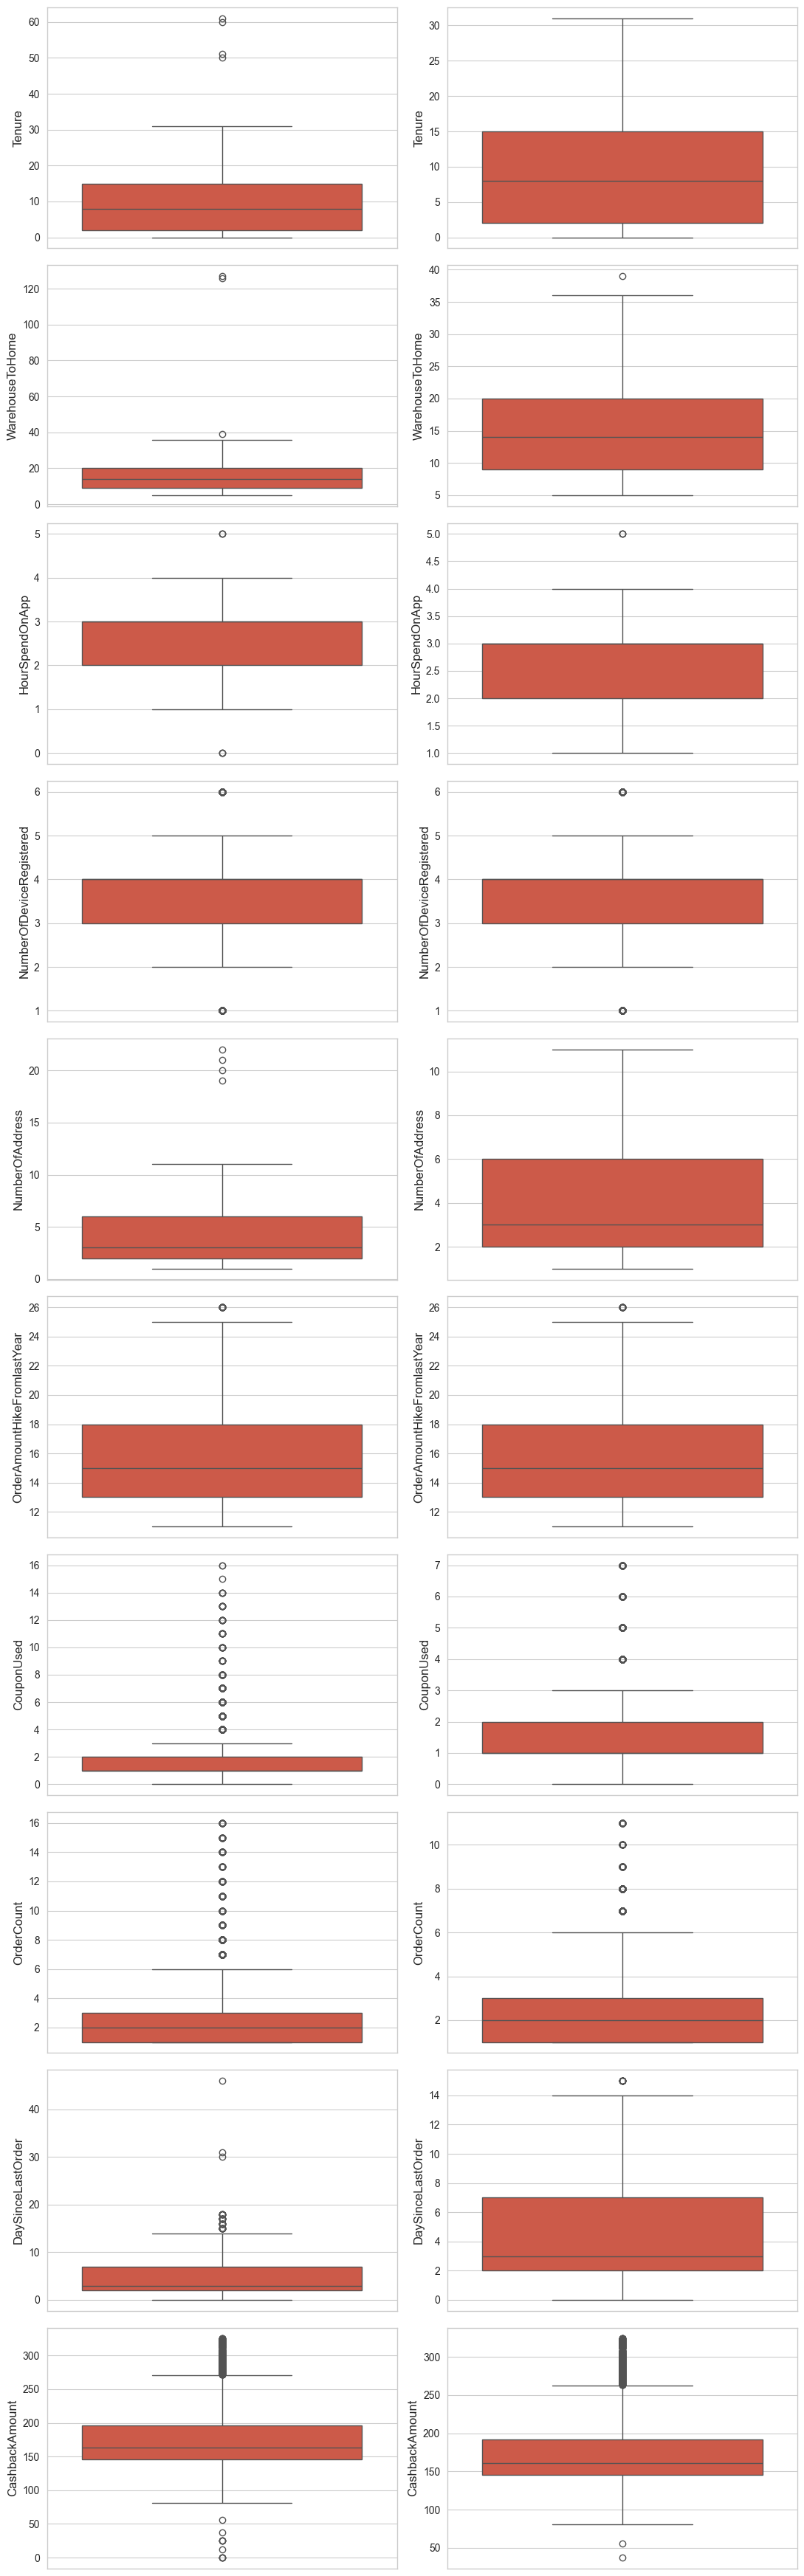

In [15]:
#Gerando novamente os gráficos das variáveis contínuas para verificar de forma gráfica como ficaram antes e depois do tratamento
fig, axes = plt.subplots(len(colunas_continuas), 2, figsize=(11, 35))
num = 0

for i in colunas_continuas:
    _ = sns.boxplot(data=df, y=i, ax=axes[num, 0])
    _ = sns.boxplot(data=df_sem_outliers, y=i, ax=axes[num, 1])
    num += 1
    _ = fig.tight_layout()

De acordo com os gráficos de caixa, ainda existem "outliers" que poderiam ser removidos, mas vamos manter com base na técnica do desvio-padrão para termos uma avaliação estatística e não perdermos tantos dados.

## **Correlação**

Para a análise de correlação, será utilizado a **correlação de Spearman** porque se torna possível verificar a correlação entre variáveis continuas não normalmente distribuídas e variáveis categóricas dummyzadas sem a necessidade de assumir uma distribuição específica dos dados.

In [17]:
#Gerando os dataframes de correlação e p-valor da correlação para os gráficos
correlation_matrix = pd.DataFrame(index=df_sem_outliers.columns[1:], columns=df_sem_outliers.columns[1:])
p_values_matrix = pd.DataFrame(index=df_sem_outliers.columns[1:], columns=df_sem_outliers.columns[1:])

for i in df_sem_outliers[df_sem_outliers.columns[1:]]:
    for j in df_sem_outliers[df_sem_outliers.columns[1:]]:
        corr, p_value = spearmanr(df[i], df[j])
        correlation_matrix.loc[i, j] = corr
        p_values_matrix.loc[i, j] = p_value

#Apenas ajustando o tipo da variáveis para decimais para funcionatem nos gráficos de heatmap do Seaborn
correlation_matrix = correlation_matrix.astype(float)
p_values_matrix = p_values_matrix.astype(float)

**Matriz de Correlação**

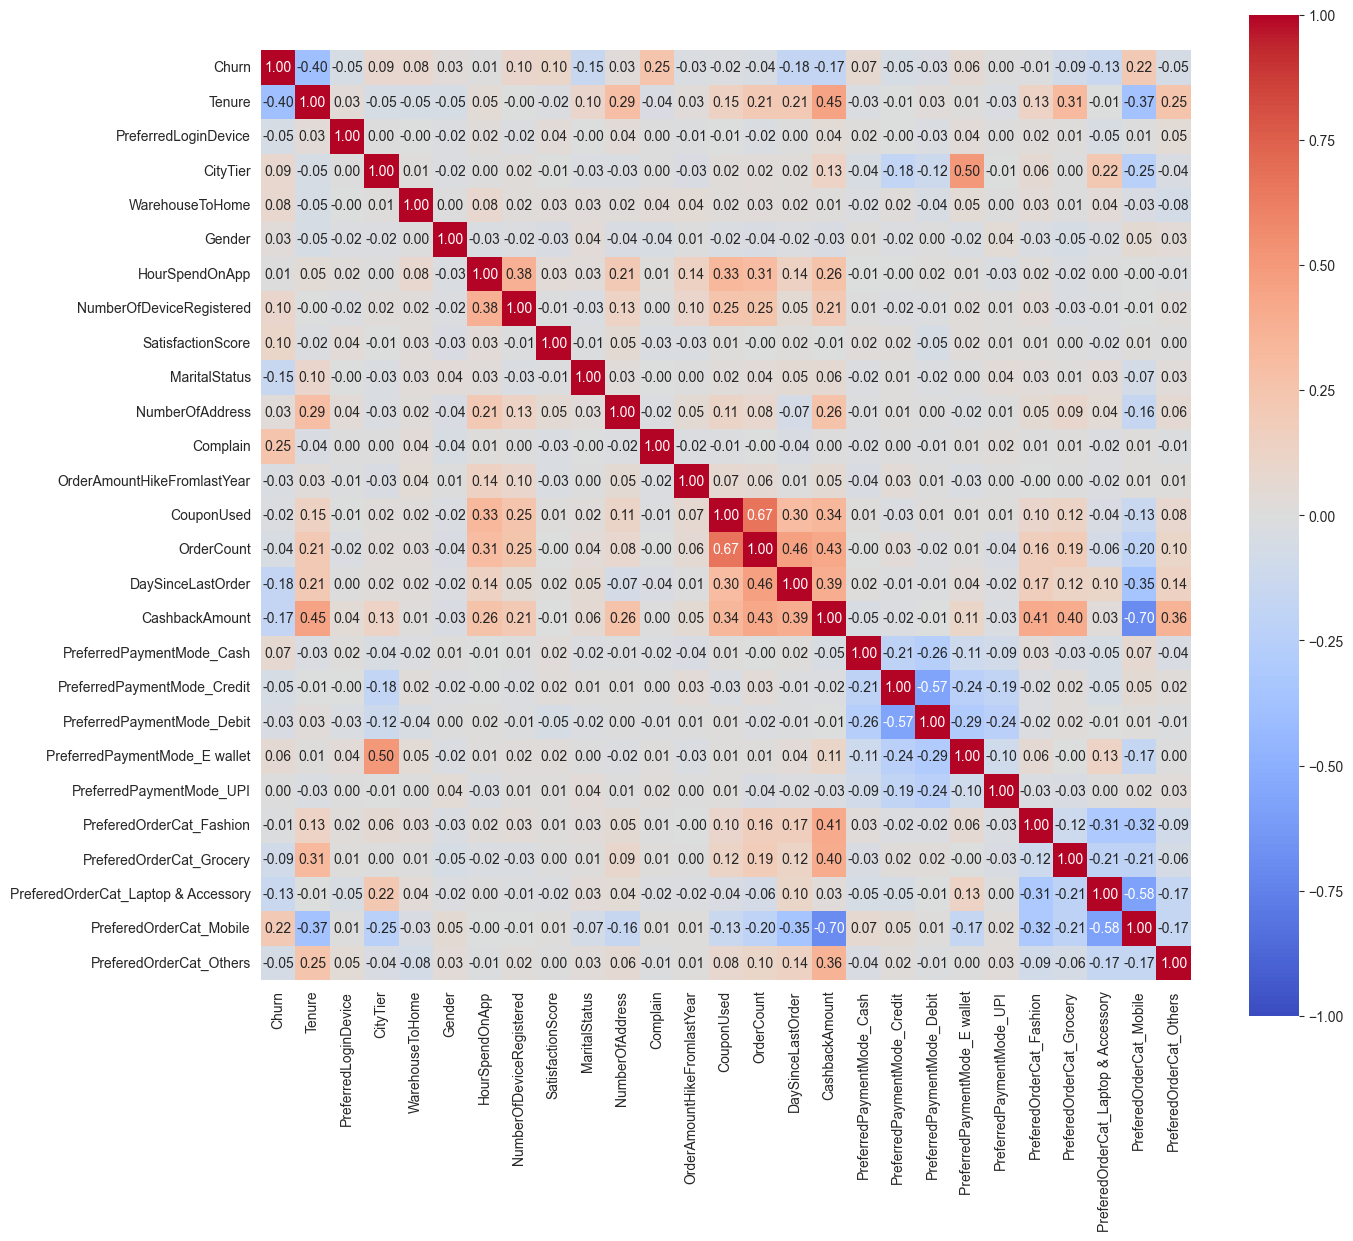

In [18]:
fig, axes = plt.subplots(figsize=(15, 13))

_ = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, 
                annot=True, fmt=".2f", cmap="coolwarm", square= True)

A matriz parece um pouco imponente quando comparamos tantas variáveis ao mesmo tempo. 

O gráfico mostra que não existem tantas relações entre as variáveis, mas vamos pontuar algumas e as mais relacionadas com o Churn.

**Algumas correlações entre variáveis independentes**
- Alta correlação positiva entre Order Count e Coupon Used, talvez tomar um pouco de cuidado por conta de autocorrelação e rodar sem uma delas no modelo.
- Correlação positiva significativa entre Day Since Last Order e Order Count.
- Correlação positiva significativa entre Cashback Amount e Order Count.
- Correlação positiva significativa entre Cashback Amount e Tenure.
- Alta Correlação negativa entre Prefered Order Category Mobile e Cashback Amount.
- Alta Correlação negativa entre Prefered Order Category Mobile e Prefered Order Category Laptop and Accessory.
- Alta Correlação negativa entre Prefered Payment Mode Debit e Prefered Payment Mode Credit.

**Algumas correlações entre a variável dependente (Churn) com variáveis independentes**
- Correlação positiva significativa com Complain. Quando há reclamação, maior a possibilidade de churn.
- Correlação positiva significativa com Prefered Order Category Mobile. Quando essa é a categoria mobile é a preferida, maior a possibilidade de churn.
- Correlação negativa significativa com Tenure. Quanto maior o tempo com ecommerce, menor a possiblidade de churn.

**Sempre bom relembrar que estão apenas verificando correlação, que é diferente de causalidade entre elas!**

**Matriz de P-valor**

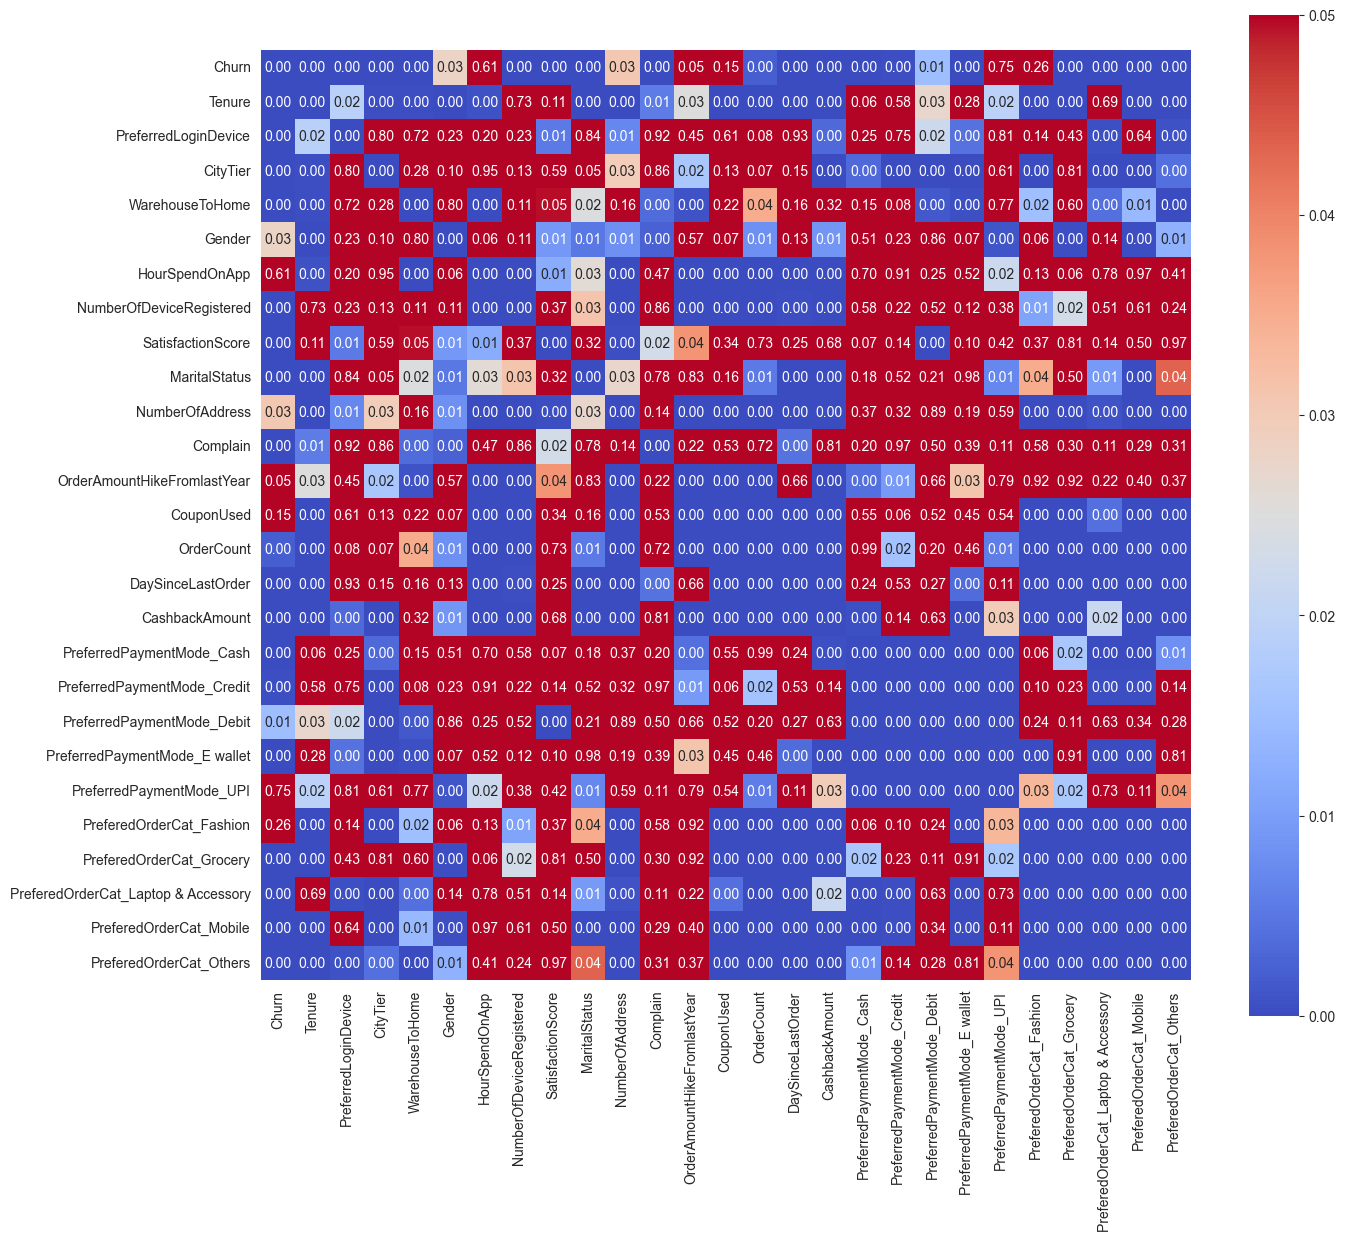

In [20]:
fig, axes = plt.subplots(figsize=(15, 13))

_ = sns.heatmap(p_values_matrix, vmin=0, vmax=0.05, 
                annot=True, fmt=".2f", cmap="coolwarm", square= True)

Essa matriz de P-valor é para entender se existe significancia estatística na correlação entre as variáveis.

Para analisar se as correções são significativas, será utilizado o nível de significância de 0,05:
- Se o valor for maior que 0,05, quer dizer não há significância estatística nessa correlação.
    - Por exemplo: a correlação entre Hours Spend On App e Churn deu 0,61, sendo maior que 0,05, significa que não há significância estatística nessa correlação.
- Se o valor for menor que 0,05, quer dizer há significância estatística nessa correlação.
    - Por exemplo: a correlação entre Tenure e Churn deu 0,00, sendo menor que 0,05, significa que há significância estatística nessa correlação.

Avaliar essa matriz nos ajuda um pouco a escolher quais variáveis poderiamos utilizar no modelo.

# **Resumo dessa análise e insights para a contrução do modelo**
De tudo que foi trabalhado nesse notebook, parece que a análise de correlação é que trouxe mais possibilidades para gerar os modelos, com algumas sugestões de quais variáveis podemos selecionar e quais poderiamos retirar do modelo.

In [21]:
#Gerando um novo arquivo Excel para a próxima análise
df_sem_outliers.to_excel("ecommerce_dataset_tratado_e_sem_outliers.xlsx")